In [1]:
import pandas as p
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = p.read_csv("CongressionalVotingID.shuf.lrn.csv")
df_result = p.read_csv("CongressionalVotingID.shuf.tes.csv")
expected = p.read_csv("CongressionalVotingID.shuf.sol.ex.csv")


y = df["class"]

df_removed_column = df.drop(columns=["class", "ID"])
X = df_removed_column.replace({"unknown": np.nan})

ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)

imputer = KNNImputer(n_neighbors=4, weights="uniform")
X = imputer.fit_transform(X)


df_result = df_result.drop(columns=["ID"])
feature_names = df_result.columns.values
print(feature_names)

df_result = df_result.replace({"unknown": np.nan})
df_result = ordinal_encoder.transform(df_result)
df_result = imputer.transform(df_result)

['handicapped-infants' 'water-project-cost-sharing'
 'adoption-of-the-budget-resolution' 'physician-fee-freeze'
 'el-salvador-aid' 'religious-groups-in-schools' 'anti-satellite-test-ban'
 'aid-to-nicaraguan-contras' 'mx-missile' 'immigration'
 'synfuels-crporation-cutback' 'education-spending'
 'superfund-right-to-sue' 'crime' 'duty-free-exports'
 'export-administration-act-south-africa']


In [15]:
clf = GaussianNB()
clf = clf.fit(X, y)
scores1 = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print("avg_accuracy = {}".format(np.mean(scores1)))

predicted = clf.predict(df_result)
expected["class"] = predicted
expected.to_csv("result_gauss.csv", index=False)

avg_accuracy = 0.9177489177489176


i = 2 avg_accuracy = 0.9400432900432902
i = 3 avg_accuracy = 0.9359307359307361
i = 4 avg_accuracy = 0.9402597402597402
i = 5 avg_accuracy = 0.9218614718614718
i = 6 avg_accuracy = 0.9218614718614718
i = 7 avg_accuracy = 0.9218614718614718
i = 8 avg_accuracy = 0.9218614718614718
i = 9 avg_accuracy = 0.9218614718614718
i = 10 avg_accuracy = 0.9218614718614718
i = 11 avg_accuracy = 0.9218614718614718
i = 12 avg_accuracy = 0.9218614718614718
i = 13 avg_accuracy = 0.9218614718614718
i = 14 avg_accuracy = 0.9218614718614718
i = 15 avg_accuracy = 0.9218614718614718
i = 16 avg_accuracy = 0.9218614718614718
i = 17 avg_accuracy = 0.9218614718614718
i = 18 avg_accuracy = 0.9218614718614718
i = 19 avg_accuracy = 0.9218614718614718


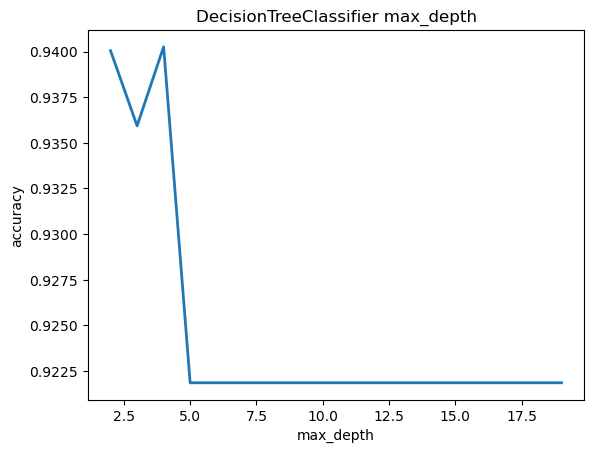

In [24]:
array_i = []
array_avg = []
for i in range(2, 20, 1):
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state=30)
    clf = clf.fit(X, y)
    scores1 = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("i = {} avg_accuracy = {}".format(i, np.mean(scores1)))
    array_i.append(i)
    array_avg.append(np.mean(scores1))

    predicted = clf.predict(df_result)
    expected["class"] = predicted
    

fig, ax = plt.subplots()

ax.plot(array_i, array_avg, linewidth=2.0)
ax.set_title("DecisionTreeClassifier max_depth")
ax.set_ylabel("accuracy")
ax.set_xlabel("max_depth")

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

# scores1 = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
# print("avg_accuracy = {}".format(np.mean(scores1)))

# plt.figure()
# tree.plot_tree(clf, filled=True)
# plt.title("decision tree")
# plt.savefig('tree.png', dpi=400)

# predicted = clf.predict(df_result)
# expected["class"] = predicted
# expected.to_csv("result_desission_tree.csv", index=False)

i = 10 avg_accuracy = 0.9264069264069266
i = 60 avg_accuracy = 0.9357142857142857
i = 110 avg_accuracy = 0.9450216450216452
i = 160 avg_accuracy = 0.9495670995670997
i = 210 avg_accuracy = 0.9495670995670997
i = 260 avg_accuracy = 0.9495670995670997
i = 310 avg_accuracy = 0.9495670995670997
i = 360 avg_accuracy = 0.9495670995670997
i = 410 avg_accuracy = 0.9543290043290045
i = 460 avg_accuracy = 0.9543290043290045
i = 510 avg_accuracy = 0.9543290043290045
i = 560 avg_accuracy = 0.9543290043290045
i = 610 avg_accuracy = 0.9543290043290045
i = 660 avg_accuracy = 0.9543290043290045
i = 710 avg_accuracy = 0.9543290043290045
i = 760 avg_accuracy = 0.9543290043290045
i = 810 avg_accuracy = 0.9543290043290045
i = 860 avg_accuracy = 0.9543290043290045
i = 910 avg_accuracy = 0.9543290043290045
i = 960 avg_accuracy = 0.9543290043290045


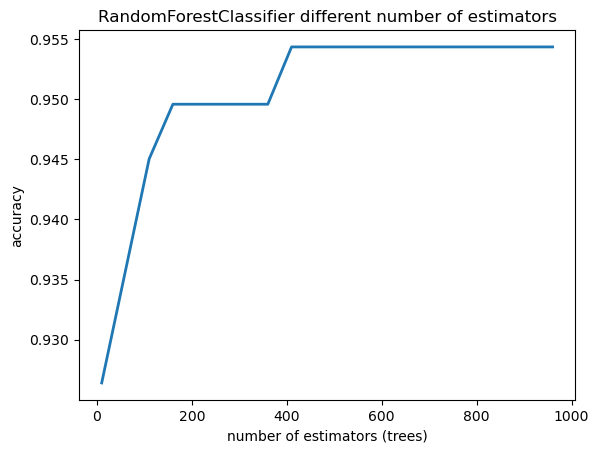

In [5]:
array_i = []
array_avg = []
for i in range(10, 1000, 50):
    clf = RandomForestClassifier(max_depth=None, random_state=42, n_estimators=i)
    clf = clf.fit(X, y)
    scores1 = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("i = {} avg_accuracy = {}".format(i, np.mean(scores1)))
    array_i.append(i)
    array_avg.append(np.mean(scores1))

    predicted = clf.predict(df_result)
    expected["class"] = predicted
    
fig, ax = plt.subplots()

ax.plot(array_i, array_avg, linewidth=2.0)
ax.set_title("RandomForestClassifier different number of estimators")
ax.set_ylabel("accuracy")
ax.set_xlabel("number of estimators (trees)")

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

i = 1 avg_accuracy = 0.9175324675324676
i = 2 avg_accuracy = 0.9402597402597402
i = 3 avg_accuracy = 0.944805194805195
i = 4 avg_accuracy = 0.9357142857142857
i = 5 avg_accuracy = 0.9402597402597402
i = 6 avg_accuracy = 0.9450216450216452
i = 7 avg_accuracy = 0.9450216450216452
i = 8 avg_accuracy = 0.9450216450216452
i = 9 avg_accuracy = 0.9450216450216452
i = 10 avg_accuracy = 0.9450216450216452
i = 11 avg_accuracy = 0.9450216450216452
i = 12 avg_accuracy = 0.9450216450216452
i = 13 avg_accuracy = 0.9450216450216452
i = 14 avg_accuracy = 0.9450216450216452


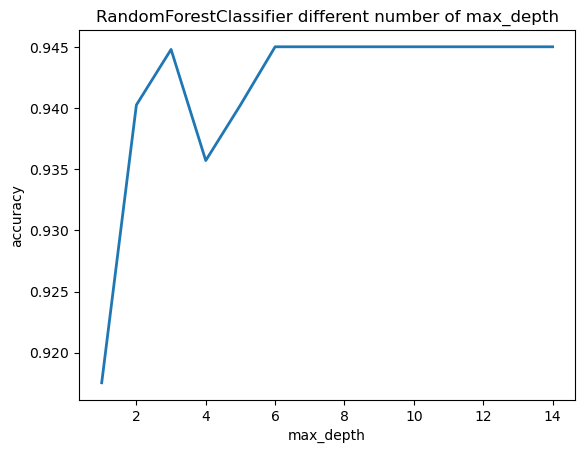

In [6]:
array_i = []
array_avg = []
for i in range(1, 15, 1):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf = clf.fit(X, y)
    scores1 = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("i = {} avg_accuracy = {}".format(i, np.mean(scores1)))
    array_i.append(i)
    array_avg.append(np.mean(scores1))

    predicted = clf.predict(df_result)
    expected["class"] = predicted
    
fig, ax = plt.subplots()

ax.plot(array_i, array_avg, linewidth=2.0)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
ax.set_title("RandomForestClassifier different number of max_depth")
ax.set_ylabel("accuracy")
ax.set_xlabel("max_depth")
plt.show()

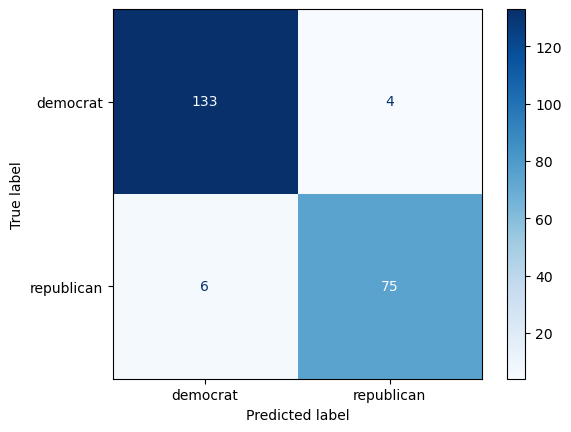

In [7]:
# Plot the confusion matrix
# n_estimators is 200 here
clf = RandomForestClassifier(max_depth=None, random_state=42, n_estimators=200)
clf = clf.fit(X, y)
scores1 = cross_val_predict(clf, X, y, cv=10)


predicted = clf.predict(df_result)
expected["class"] = predicted

cm = confusion_matrix(y.values, scores1)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.show() 


[0.01911972 0.00877444 0.13933252 0.3452867  0.07390685 0.00658883
 0.01086446 0.07056019 0.03257252 0.01243591 0.03181844 0.14209611
 0.01135236 0.05001277 0.03319181 0.01208636]


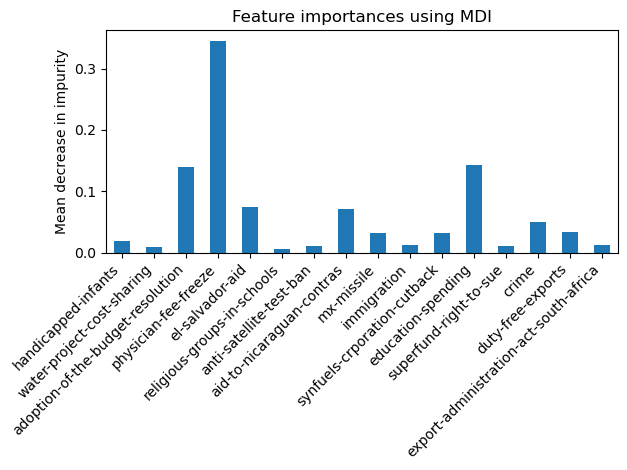

In [12]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_], axis=0)
print(importances)
forest_importances = p.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(forest_importances.index, rotation=45, ha='right')
fig.tight_layout()

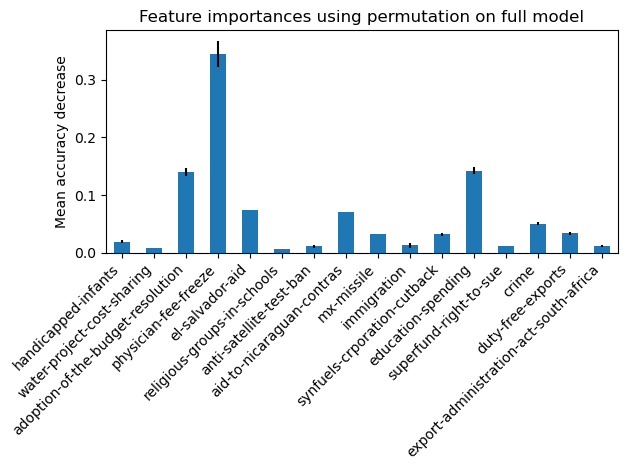

In [14]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X, y, n_repeats=10, random_state=42, n_jobs=2
)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xticklabels(forest_importances.index, rotation=45, ha='right')

fig.tight_layout()
plt.show()
# since there are almost the same results as in the plot before, this is a good indicator that there are no random features.